## Title : Implement feed forward neural network with keras and tensorflow

In [3]:
# importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import random
%matplotlib inline


mnist is the dataset having 70,000 images. Which having size of 28 x 28. And features size is 784. In this mnist
dataset there are dataset of handwritten digit. Which is used as 60000 images for traning and 10000 for testing.

In [4]:
# import dataset mnist
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
# print shape and length of training dataset
print("len of x_train:",len(x_train))
print("len of x_test:",len(x_test))

len of x_train: 60000
len of x_test: 10000


In [6]:
#shape of training and testing
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of x_test: (10000, 28, 28)


In [7]:
# check features of first image
first_image = x_train[0]
first_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

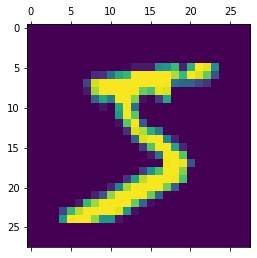

In [14]:
# show first image using plt.matshow
plt.matshow(first_image)

In [8]:
# normalize our data for reduce overfitting
x_train = x_train/255
x_test = x_test/255

In [9]:
print(x_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Build model architecture

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
# compile the model
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
#fit the model
history = model.fit(x_train,y_train,epochs=10,validation_data=[x_test,y_test])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6580 - accuracy: 0.8355 - val_loss: 0.3593 - val_accuracy: 0.9018
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3435 - accuracy: 0.9039 - val_loss: 0.3007 - val_accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2982 - accuracy: 0.9167 - val_loss: 0.2685 - val_accuracy: 0.9252
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2682 - accuracy: 0.9247 - val_loss: 0.2483 - val_accuracy: 0.9308
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2454 - accuracy: 0.9307 - val_loss: 0.2269 - val_accuracy: 0.9361
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2259 - accuracy: 0.9368 - val_loss: 0.2115 - val_accuracy: 0.9396
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2095 - accuracy: 0.9413 - val_loss: 0.1974 - val_accuracy:

In [19]:
# evaluate the model
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss:%.3f" %test_loss)
print("Accuracy:%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1648 - accuracy: 0.9524
Loss:0.165
Accuracy:0.952


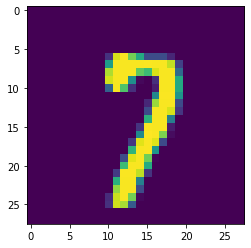

In [20]:
# # Making Prediction on New Data
import random
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [21]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

Handwritten number in the image is= 7


Text(0.5, 1.0, 'Graph for Loss')

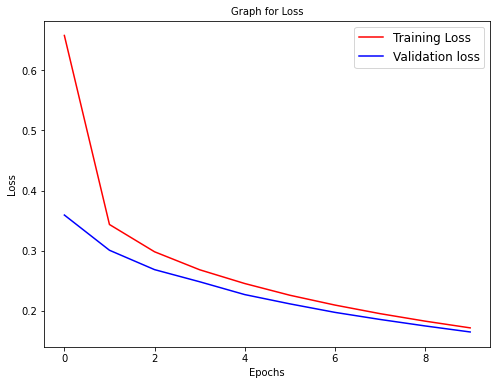

In [35]:
# plot the graphs for accuracy and loss
# Graph for loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend(['Training Loss', 'Validation loss'],fontsize=12)
plt.xlabel('Epochs',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Graph for Loss',fontsize=10)

Text(0.5, 1.0, 'Graph For Accuracy ')

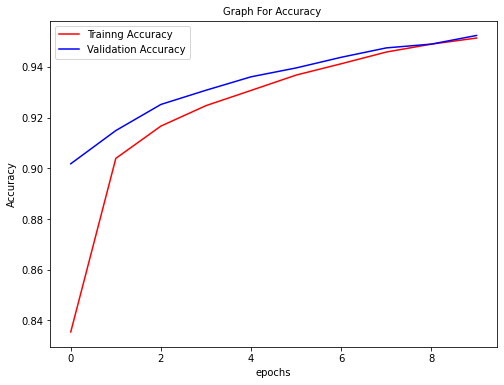

In [26]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend(["Trainng Accuracy","Validation Accuracy"])
plt.xlabel('epochs', fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Graph For Accuracy ',fontsize=10)